# Day 6

## Part 1

- Boats charge up for n $ms$ before moving at n $mms^{-1}$ for the remainder of the race.
- Find the number of ways you could beat the best time for each race record.
- The answer is the product of all these values.

In [5]:
from dataclasses import dataclass
import tqdm
from matplotlib import pyplot as plt

from advent_of_code_utils.advent_of_code_utils import (
    ParseConfig, parse_from_file, markdown
)

In [10]:
def extract_numbers(number_string: str) -> list[int]:
    """extracts the numbers from the day 6 input"""
    return [int(value) for value in number_string.split(' ') if value != '']

parser = ParseConfig('\n', ParseConfig(':', [str, extract_numbers]))

stat_lists = parse_from_file('puzzle_input\\day_6.txt', parser)


test_stat.get_possible()=[0, 6, 10, 12, 12, 10, 6, 0]
test_stat.winners=4


Text(0.5, 1.0, 'Quadratic and blast!')

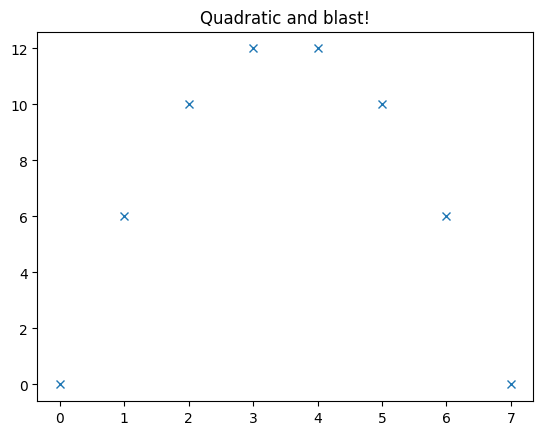

In [18]:
@dataclass
class Stat:
    time: int
    distance: int

    def get_possible(self) -> list[int]:
        """returns a list of distances possible for this stat"""
        self.possible = [
            hold_time * (self.time - hold_time)
            for hold_time in range(self.time + 1)
        ]
        return self.possible

    @property
    def winners(self) -> int:
        """counts the number of winners from the self.possible"""
        return sum([outcome > self.distance for outcome in self.possible])
    
    def plot(self, ax: plt.Axes) -> None:
        """Adds this stat's possible outcomes to an axis"""
        ax.plot(
            list(range(self.time + 1)), self.possible,
            marker='x', linestyle=''
        )


test_stat = Stat(7, 9)
print(f'{test_stat.get_possible()=}')
print(f'{test_stat.winners=}')
fig, ax = plt.subplots()
test_stat.plot(ax)
ax.set_title('Quadratic and blast!')

(-3.9000000000000004, 81.9, -76.05, 1597.05)

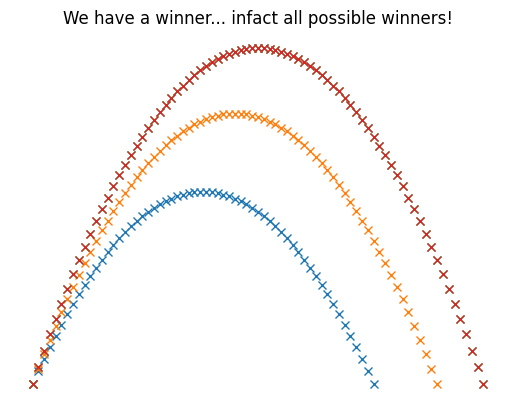

In [26]:
# ok now for real
stats = [Stat(*values) for values in zip(*[values for _, values in stat_lists])]

fig, ax = plt.subplots()
product = 1
for stat in stats:
    stat.get_possible()
    stat.plot(ax)
    product *= stat.winners
ax.set_title('We have a winner... infact all possible winners!')
ax.axis('off')  # remove ticks don't want to give away the input!

In [27]:
markdown(
    '### Solution',
    f'The product of all winning outcomes is: {product}'
)

### Solution
The product of all winning outcomes is: 227850